<a href="https://colab.research.google.com/github/RKS8347/DL-projects/blob/main/Product_recommender_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Project Sentiment Analysis Recommender syatem

# problem statement:- Suggest top 5 product for investement bracket,with detailed report sentiment analysis on those product reviews.

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_selection import SelectKBest
import re

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#useful for loading and working with large datasets in JSON format compressed in .gz files in Python.
import gzip
import json
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')
df=getDF('/content/drive/MyDrive/reviews_Home_and_Kitchen_5.json.gz')

In [ ]:
df.head().T

,0,1,2,3,4
reviewerID,APYOBQE6M18AA,A1JVQTAGHYOL7F,A3UPYGJKZ0XTU4,A2MHCTX43MIMDZ,AHAI85T5C2DH3
asin,0615391206,0615391206,0615391206,0615391206,0615391206
reviewerName,Martin Schwartz,Michelle Dinh,mirasreviews,"M. Johnson ""Tea Lover""",PugLover
helpful,"[0, 0]","[0, 0]","[26, 27]","[14, 18]","[0, 0]"
reviewText,My daughter wanted this book and the price on ...,I bought this zoku quick pop for my daughterr ...,There is no shortage of pop recipes available ...,This book is a must have if you get a Zoku (wh...,This cookbook is great. I have really enjoyed...
overall,5.0,5.0,4.0,5.0,4.0
summary,Best Price,zoku,"Excels at Sweet Dessert Pops, but Falls Short ...",Creative Combos,A must own if you own the Zoku maker...
unixReviewTime,1382140800,1403049600,1367712000,1312416000,1402099200
reviewTime,"10 19, 2013","06 18, 2014","05 5, 2013","08 4, 2011","06 7, 2014"


In [ ]:
# checking shape of dataset
df.shape

(551682, 9)

# prepare datafor KNN modeling

KNN is best suited for smaller datasets with low dimensionality. It's commonly used in recommendation systems, handwriting recognition, image classification, and anomaly detection.

In [ ]:
# make 2 new columns from helpful columns
df[['helpfulfirstelement','helpfulsecondelement']]= pd.DataFrame(df.helpful.values.tolist(), index= df.index)


In [ ]:
df.helpful.values.tolist()

[[0, 0],
 [0, 0],
 [26, 27],
 [14, 18],
 [0, 0],
 [0, 0],
 [2, 3],
 [32, 39],
 [13, 13],
 [0, 0],
 [3, 3],
 [0, 0],
 [0, 0],
 [1, 2],
 [16, 16],
 [1, 1],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 1],
 [0, 0],
 [4, 4],
 [0, 0],
 [1, 1],
 [0, 0],
 [2, 2],
 [2, 3],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [13, 14],
 [11, 11],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [2, 2],
 [62, 64],
 [0, 0],
 [1, 1],
 [0, 0],
 [5, 5],
 [0, 0],
 [0, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [2, 2],
 [0, 0],
 [2, 2],
 [0, 0],
 [0, 0],
 [2, 2],
 [4, 4],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [1, 1],
 [1, 1],
 [2, 2],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [4, 4],
 [0, 0],
 [2, 2],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [2, 2],
 [0, 1],
 [0, 0],
 [0, 0],
 [2, 2],
 [0, 0],
 [9, 11],
 [0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [1, 1],
 [0, 0],
 [15, 15],
 [0, 0],
 [0, 0],
 [0, 1],


In [ ]:
# drop the helpful from axis=1
df.drop('helpful',axis=1,inplace=True)

In [ ]:
#Checking the shape
df.shape

(551682, 10)

In [ ]:
# review count
reviews_count=df.groupby('asin').count().reset_index()

In [ ]:
df.head(5).T

,0,1,2,3,4
reviewerID,APYOBQE6M18AA,A1JVQTAGHYOL7F,A3UPYGJKZ0XTU4,A2MHCTX43MIMDZ,AHAI85T5C2DH3
asin,0615391206,0615391206,0615391206,0615391206,0615391206
reviewerName,Martin Schwartz,Michelle Dinh,mirasreviews,"M. Johnson ""Tea Lover""",PugLover
reviewText,My daughter wanted this book and the price on ...,I bought this zoku quick pop for my daughterr ...,There is no shortage of pop recipes available ...,This book is a must have if you get a Zoku (wh...,This cookbook is great. I have really enjoyed...
overall,5.0,5.0,4.0,5.0,4.0
summary,Best Price,zoku,"Excels at Sweet Dessert Pops, but Falls Short ...",Creative Combos,A must own if you own the Zoku maker...
unixReviewTime,1382140800,1403049600,1367712000,1312416000,1402099200
reviewTime,"10 19, 2013","06 18, 2014","05 5, 2013","08 4, 2011","06 7, 2014"
helpfulfirstelement,0,0,26,14,0
helpfulsecondelement,0,0,27,18,0


# Take the product with more than 100 product review

In [ ]:
# review count
reviews_count=df.groupby('asin').count().reset_index()

In [ ]:
reviews_count.head(5).T

,0,1,2,3,4
asin,0615391206,0689027818,0912696591,1223070743,1567120709
reviewerID,11,5,93,8,16
reviewerName,11,5,93,8,16
reviewText,11,5,93,8,16
overall,11,5,93,8,16
summary,11,5,93,8,16
unixReviewTime,11,5,93,8,16
reviewTime,11,5,93,8,16
helpfulfirstelement,11,5,93,8,16
helpfulsecondelement,11,5,93,8,16


In [ ]:
# review count
reviews_count=df.groupby('asin').count().reset_index()

# merge the DataFrames
df_merged=pd.merge(df,reviews_count,on='asin',how='right')

# renaming the columns
df_merged.rename(columns={'overall_x':'overall_review' ,'reviewerID_y':'reviews_count','summary_x':'summary_review'},inplace=True)

# selecting the desired columns for the final DataFrame
df_final=df_merged[['asin','overall_review','reviews_count','summary_review']]

In [ ]:
df_merged=df_merged.sort_values(by='reviews_count',ascending=False)

In [ ]:
# selecting the product with more than 100 review
df_count=df_merged[df_merged.reviews_count>50]

In [ ]:
df_count.head(5)

,reviewerID_x,asin,reviewerName_x,reviewText_x,overall_review,summary_review,unixReviewTime_x,reviewTime_x,helpfulfirstelement_x,helpfulsecondelement_x,reviews_count,reviewerName_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,helpfulfirstelement_y,helpfulsecondelement_y
42570,A3S6PMCM0ZLFIK,B00006JSUA,Karen,I have used my skillet a number of times now. ...,5.0,I love my skillet!,1369353600,"05 24, 2013",0,0,1064,1064,1064,1064,1064,1064,1064,1064,1064
43044,A1PB1BJSULOG4L,B00006JSUA,USTVMAN,"This skillet from Lodge is truly ""pre-seasoned...",5.0,Wonderful Product,1321920000,"11 22, 2011",0,1,1064,1064,1064,1064,1064,1064,1064,1064,1064
43050,A1L2UFXTPRR6SR,B00006JSUA,"Vanessa M. Smith ""snowtoes""",My husband likes to fry bacon and morel mushro...,5.0,Works well on glasstop Stove,1388620800,"01 2, 2014",1,1,1064,1064,1064,1064,1064,1064,1064,1064,1064
43049,A3VQ9SGVA672NW,B00006JSUA,VA Mom,I am ready to ditch my all-clad non-stick pans...,5.0,Amazed!,1321056000,"11 12, 2011",2,2,1064,1064,1064,1064,1064,1064,1064,1064,1064
43048,A39H72H8NPM0R,B00006JSUA,Valuegal,"I got this because I need more iron, and I eat...",2.0,Not as seasoned as it needs to be for eggs,1281312000,"08 9, 2010",3,7,1064,1064,1064,1064,1064,1064,1064,1064,1064


In [ ]:
# the code will return a pandas Dataframe with the mean rating for each asin
df_review_mean=df.groupby('asin')['overall'].mean().reset_index()

In [ ]:
df_review_mean.head(5)

,asin,overall
0,0615391206,4.454545
1,0689027818,5.000000
2,0912696591,4.548387
3,1223070743,4.250000
4,1567120709,4.062500


In [ ]:
# the code attaempet to create dataframe of all the reviews for each product.
df_summary_review=pd.DataFrame(df_count.groupby('asin')['summary_review'].apply(list).reset_index())

In [ ]:
df_summary_review

,asin,summary_review
0,0912696591,"[Good refresher, great book for beginners, Nee..."
1,B00000JGRP,"[Mighty Mouse, Always have been happy with it ..."
2,B00000JGRT,"[cute and easy!, Paddle broke within 2 months,..."
3,B00002N5Z9,"[Too big, loud, powerful, lets bugs through fo..."
4,B00002N602,"[My Pot, Pressure Cooker, Great product, Very ..."
...,...,...
2061,B00K7P0D9G,"[Effective Kitchen Slicer/Peeler..., Great Jul..."
2062,B00KM9W2PU,"[A perfect press, If you use fresh garlic this..."
2063,B00KMXNJPI,"[Soft on the tootsies, So nice on my toes, Lik..."
2064,B00KQJ42CW,"[Super nice for the gym, Nice Heavy Cotton Tow..."


In [ ]:
df_summary_review.head()

,asin,summary_review
0,0912696591,"[Good refresher, great book for beginners, Nee..."
1,B00000JGRP,"[Mighty Mouse, Always have been happy with it ..."
2,B00000JGRT,"[cute and easy!, Paddle broke within 2 months,..."
3,B00002N5Z9,"[Too big, loud, powerful, lets bugs through fo..."
4,B00002N602,"[My Pot, Pressure Cooker, Great product, Very ..."


In [ ]:
# merge the review
df_model=pd.merge(df_summary_review,df_review_mean,on='asin',how='inner')

In [ ]:
df_model_data=df_model[['asin','summary_review','overall']]

In [ ]:
df_model_data.head(5)

,asin,summary_review,overall
0,0912696591,"[Good refresher, great book for beginners, Nee...",4.548387
1,B00000JGRP,"[Mighty Mouse, Always have been happy with it ...",3.948052
2,B00000JGRT,"[cute and easy!, Paddle broke within 2 months,...",4.473934
3,B00002N5Z9,"[Too big, loud, powerful, lets bugs through fo...",4.176471
4,B00002N602,"[My Pot, Pressure Cooker, Great product, Very ...",4.563107


# define a text process as text as input parameters

In [ ]:
# define text process as text as input parameters
def text_process(text):
    # make text lower case
    text=text.lower()
    # Except a to z we substitue it with ''
    text=re.sub('[^a-z]',' ',text).strip()
    # return text
    return text

# Tfidfvectoriser model extraction from clean_summary review column:

In [ ]:
print(type(df_model_data))  # Ensure this is a DataFrame



<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Process the 'summary_review' column and remove duplicates
df_model_data['clean_summary_review'] = df_model_data['summary_review'].apply(' '.join).apply(lambda x: text_process(x)).copy(deep=True)

# Drop duplicates based on 'overall' and reset the index
df_model_data = df_model_data.reset_index()
df_model_data.drop_duplicates(['overall'], keep='last', inplace=True)


# Define the TfidfVectorizer with specified parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=500)

# Fit and transform the 'clean_summary_review' column
X = tfidf.fit_transform(df_model_data['clean_summary_review'])

# splitting X into train and test dataset

In [ ]:
# the code will create a DATAFRAME with the data that is stored in X_review
X_reviews=pd.DataFrame(X.A,columns=tfidf.get_feature_names_out()).astype(int)

In [ ]:
# the code will create a list of reviews and then convert it into array
X_reviews_array=np.array(X_reviews)

In [ ]:
# split-percent=0.8
split_percent=0.8
# the code is used to calculate the percentage of reviews that are positive and negative
split_size=np.floor(split_percent*X_reviews.shape[0]).astype(int)


In [ ]:
X_reviews.head()

,absolutely,accurate,actually,addition,advertised,affordable,air,alternative,amazing,amazon,...,works great,works like,works perfectly,worth,worth money,wow,wrong,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split the_the data set
X_train=X_reviews_array[:split_size]
X_test=X_reviews_array[split_size:]

In [ ]:
split_size

1255

# predective modeling using KNN classifier

In [ ]:
y_train=df_model_data['overall'][:X_train.shape[0]].astype(int)
y_test=df_model_data['overall'][X_train.shape[0]:].astype(int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Now you can use KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
knnclassifier.fit(X_train, y_train)
knnclassifier_predictions = knnclassifier.predict(X_test)

In [ ]:
print(accuracy_score(y_test,knnclassifier_predictions))
print(mean_squared_error(y_test,knnclassifier_predictions))

0.8949044585987261
0.10509554140127389


# **Word Clouding for each review group**

In [ ]:
# the code will create a list of all the review for each over all rating
review_text_for_overall=df_model_data.groupby('overall')['clean_summary_review'].apply(list).reset_index()

In [ ]:
review_text_for_overall.head(5)

,overall,clean_summary_review
0,2.839286,[love it ridiculous q tip holder dispense...
1,2.942029,[coffee maker years and going strong just no...
2,2.988095,[nice fluffy and very absorbant totally not ...
3,3.016667,[six year owner it works well junk a good l...
4,3.030612,[a decent mid priced grill competition for a b...


In [ ]:
review_text_for_overall=df_model_data.groupby('overall')['clean_summary_review'].apply(list).reset_index()

In [ ]:
review_text_for_overall

,overall,clean_summary_review
0,2.839286,[love it ridiculous q tip holder dispense...
1,2.942029,[coffee maker years and going strong just no...
2,2.988095,[nice fluffy and very absorbant totally not ...
3,3.016667,[six year owner it works well junk a good l...
4,3.030612,[a decent mid priced grill competition for a b...
...,...,...
1564,4.934426,[excellent product easy to use and remove it...
1565,4.952381,[best ever good grip awesome ice cream scoop ...
1566,4.972603,[doesn t get any better than this super smart ...
1567,4.983051,[so helpful a beautiful addition to my daught...


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
stop_words=set(STOPWORDS)
# define a function to plot a word cloud and txt_data as input parameter+
def wordcloud_plot(txt_data,title=None):
    wordcloud=WordCloud(background_color='white',stopwords=stop_words,max_words=800,max_font_size=40,scale=3,
                        random_state=1).generate(str(txt_data))
    fig=plt.figure(1,figsize=(8,8))
    plt.axis('off')
    if title:
      fig.suptitle(title,fontsize=20)
      fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show

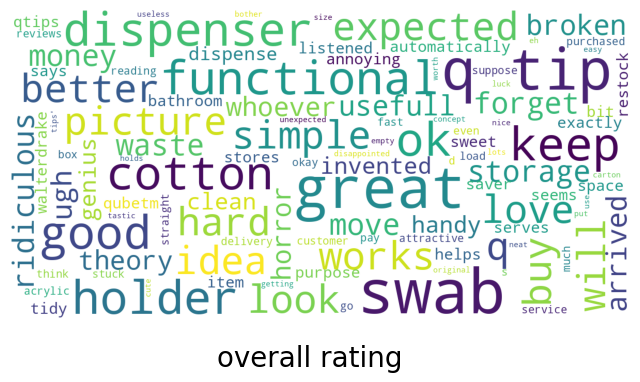

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][0],title='overall rating')

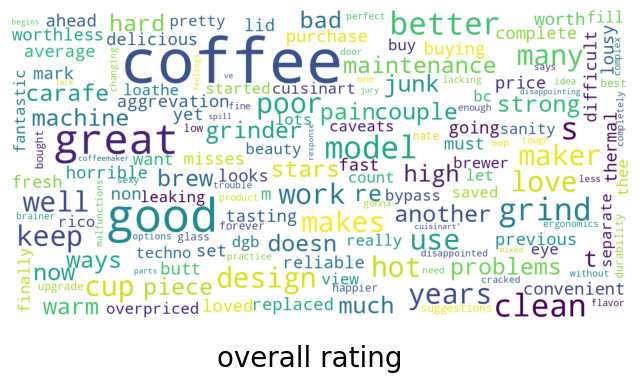

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][1],title='overall rating')

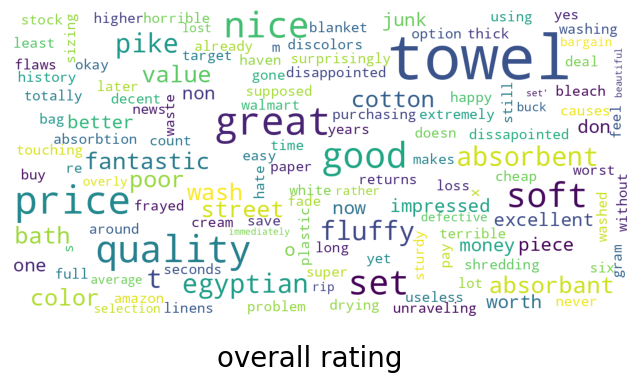

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][2],title='overall rating')

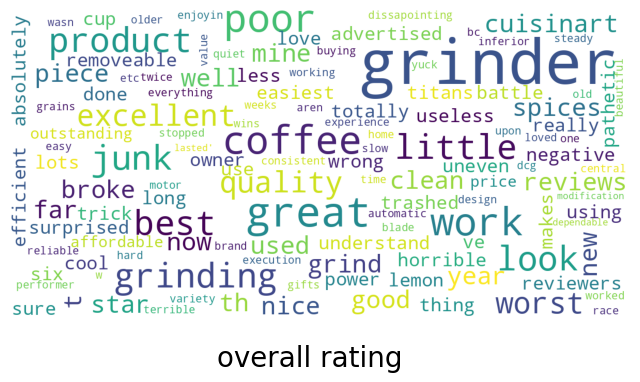

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][3],title='overall rating')

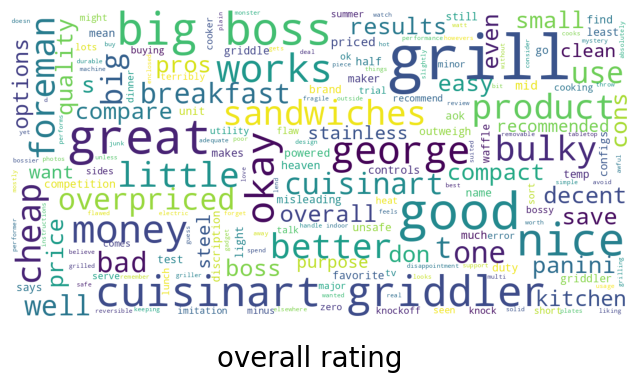

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][4],title='overall rating')

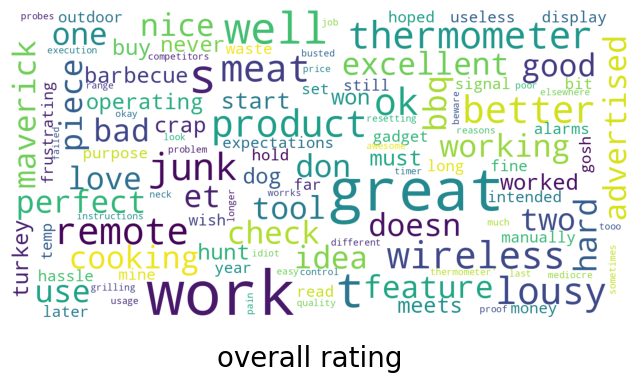

In [ ]:
wordcloud_plot(review_text_for_overall['clean_summary_review'][5],title='overall rating')

# apply KNN model to find out five nearest products

In [ ]:
# Algorithm used for calculating nearest neighbors of a given point in dataset.
# with n=5 and algorithm ball tree and fit the model
from sklearn.neighbors import NearestNeighbors
nearest_neighbors=NearestNeighbors(n_neighbors=5,algorithm='ball_tree').fit(X_train)

In [ ]:
# code will find the index of the nearest eighbors to X_train
dist,index = nearest_neighbors.kneighbors(X_train)

# we have predicted 5 products based on rating by using KNN

In [ ]:
# iterate over for loop with range of 0,X_test.shape[0]
for i in range (0,X_test.shape[0]):
  # it return the list of all the neighbors of X_test[i]
  test_neighbors=nearest_neighbors.kneighbors([X_test[i]])
  # the code sets the current products to be related products of the first product.
  related_product_indices=test_neighbors[1]
  first_nearest_product=[prod[0] for prod in related_product_indices]

  first_nearest_product=str( first_nearest_product).strip('[]')
  first_nearest_product=int(first_nearest_product)


# similarly as we done for first product we will done for 2nd product
  second_nearest_product=[prod[1] for prod in related_product_indices]

  second_nearest_product=str(second_nearest_product).strip('[]')
  second_nearest_product=int(second_nearest_product)
# similarly as we done for first product we will done for 3rd product
  third_nearest_product=[prod[2] for prod in related_product_indices]
  third_nearest_product=str(third_nearest_product).strip('[]')
  third_nearest_product=int(third_nearest_product)
# similarly as we done for first product we will done for 4th product
  forth_nearest_product=[prod[3] for prod in related_product_indices]
  forth_nearest_product=str(forth_nearest_product).strip('[]')
  forth_nearest_product=int(forth_nearest_product)
# similarly as we done for first product we will done for 5th product
  fifth_nearest_product=[prod[4] for prod in related_product_indices]
  fifth_nearest_product=str(fifth_nearest_product).strip('[]')
  fifth_nearest_product=int(fifth_nearest_product)
# we will use try and except method
 # Try
  try:

    # for getting recommnedation
    # if <4
    if i<4:
      print('Based on product review of ',df_model_data['asin'][X_train.shape[0]+i],'the average rating is ',df_model_data['overall'][X_train.shape[0]+i])
      # print first recommended product
      print('first recommended product is',df_model_data['asin'][first_nearest_product],'the average rating is',df_model_data['overall'][first_nearest_product])
      # print second recommended product
      print('second recommended product is',df_model_data['asin'][second_nearest_product],'the average rating is',df_model_data['overall'][second_nearest_product])
      # print third recommended product
      print('third recommended product is',df_model_data['asin'][third_nearest_product],'the average rating is',df_model_data['overall'][third_nearest_product])
      # print third recommended product
# iterate over for loop with range of 0,X_test.shape[0]
for i in range(0,X_test.shape[0]):
  # it return the list of all the neighbors of X_test[i]
  test_neighbors=nearest_neighbors.kneighbors([X_test[i]])
  # the code sets the current products to be related products of the first product.
  related_product_indices=test_neighbors[1]
  first_nearest_product=[prod[0] for prod in related_product_indices]

  first_nearest_product=str(first_nearest_product).strip('[]')
  first_nearest_product=int(first_nearest_product)


# similarly as we done for first product we will done for 2nd product
  second_nearest_product=[prod[1] for prod in related_product_indices]

  second_nearest_product=str(second_nearest_product).strip('[]')
  second_nearest_product=int(second_nearest_product)
# similarly as we done for first product we will done for 3rd product
  third_nearest_product=[prod[2] for prod in related_product_indices]
  third_nearest_product=str(third_nearest_product).strip('[]')
  third_nearest_product=int(third_nearest_product)
# similarly as we done for first product we will done for 4th product
  forth_nearest_product=[prod[3] for prod in related_product_indices]
  forth_nearest_product=str(forth_nearest_product).strip('[]')
  forth_nearest_product=int(forth_nearest_product)
# similarly as we done for first product we will done for 5th product
  fifth_nearest_product=[prod[4] for prod in related_product_indices]
  fifth_nearest_product=str(fifth_nearest_product).strip('[]')
  fifth_nearest_product=int(fifth_nearest_product)
# we will use try and except method
 # Try
  try:

    # for getting recommnedation
    # if <4
    if i<4:
      print('Based on product review of ',df_model_data['asin'][X_train.shape[0]+i],'the average rating is ',df_model_data['overall'][X_train.shape[0]+i])
      # print first recommended product
      print('first recommended product is',df_model_data['asin'][first_nearest_product],'the average rating is',df_model_data['overall'][first_nearest_product])
      # print second recommended product
      print('second recommended product is',df_model_data['asin'][second_nearest_product],'the average rating is',df_model_data['overall'][second_nearest_product])
      # print third recommended product
      print('third recommended product is',df_model_data['asin'][third_nearest_product],'the average rating is',df_model_data['overall'][third_nearest_product])
      # print third recommended product
      print('forth recommended product is',df_model_data['asin'][forth_nearest_product],'the average rating is',df_model_data['overall'][forth_nearest_product])
      # print third recommended product
      print('fifth recommended product is',df_model_data['asin'][fifth_nearest_product],'the average rating is',df_model_data['overall'][fifth_nearest_product])

SyntaxError: expected 'except' or 'finally' block (<ipython-input-124-dd4052a7f7e8>, line 46)

In [ ]:
for i in range(X_test.shape[0]):
    # Get the list of neighbors for X_test[i]
    test_neighbors = nearest_neighbors.kneighbors([X_test[i]])
    related_product_indices = test_neighbors[1][0]  # Get indices of nearest neighbors as a single list

    # Extract the first 5 nearest products
    nearest_products = [int(prod) for prod in related_product_indices[:5]]

    # Try-except block to handle recommendations
    try:
        if i < 4:  # Limiting to the first 4 entries in X_test
            print(f"Based on product review of {df_model_data['asin'][X_train.shape[0] + i]}, the average rating is {df_model_data['overall'][X_train.shape[0] + i]}")

            # Print recommendations and their ratings
            for rank, product_index in enumerate(nearest_products, start=1):
                print(f"{rank}st recommended product is {df_model_data['asin'][product_index]} with an average rating of {df_model_data['overall'][product_index]}")
    except Exception as e:
        print(f"Error processing recommendation: {e}")


Based on product review of B002R5A178, the average rating is 4.443181818181818
1st recommended product is 0912696591 with an average rating of 4.548387096774194
2st recommended product is B00002N602 with an average rating of 4.563106796116505
Error processing recommendation: 3
Based on product review of B002R8JAWC, the average rating is 3.375
1st recommended product is 0912696591 with an average rating of 4.548387096774194
2st recommended product is B00002N602 with an average rating of 4.563106796116505
Error processing recommendation: 3
Error processing recommendation: 1257
Error processing recommendation: 1258
